In [16]:
import numpy as np
import pandas as pd
import string
from matplotlib import pyplot as plt
from PIL import Image
import os

In [22]:
#Reading CSV File


img_height = 30
img_width= 40


csv_path = "C:/Users/Bhanu Agrawal/Documents/GitHub/Handwriting-Recognition/English Handwritten Characters - Dhruvil Dave/english.csv"
img_folder = "C:/Users/Bhanu Agrawal/Documents/GitHub/Handwriting-Recognition/English Handwritten Characters - Dhruvil Dave/"

df = pd.read_csv(csv_path)

print(df)


                   image label
0     Img/img001-001.png     0
1     Img/img001-002.png     0
2     Img/img001-003.png     0
3     Img/img001-004.png     0
4     Img/img001-005.png     0
...                  ...   ...
3405  Img/img062-051.png     z
3406  Img/img062-052.png     z
3407  Img/img062-053.png     z
3408  Img/img062-054.png     z
3409  Img/img062-055.png     z

[3410 rows x 2 columns]


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  #Shuffle CSV dataframe

split = int(len(df)*0.8)

train_df = df[:split]
test_df = df[split:]

print(train_df)
print(test_df)

                   image label
0     Img/img001-054.png     0
1     Img/img009-034.png     8
2     Img/img052-011.png     p
3     Img/img014-017.png     D
4     Img/img032-033.png     V
...                  ...   ...
2723  Img/img006-055.png     5
2724  Img/img024-012.png     N
2725  Img/img057-046.png     u
2726  Img/img008-048.png     7
2727  Img/img055-032.png     s

[2728 rows x 2 columns]
                   image label
2728  Img/img056-006.png     t
2729  Img/img032-009.png     V
2730  Img/img047-011.png     k
2731  Img/img042-031.png     f
2732  Img/img005-038.png     4
...                  ...   ...
3405  Img/img045-005.png     i
3406  Img/img041-037.png     e
3407  Img/img007-043.png     6
3408  Img/img032-032.png     V
3409  Img/img020-032.png     J

[682 rows x 2 columns]


In [19]:
def load_images(dataframes):

    X_data = []
    Y_data = []


    for _,row in dataframes.iterrows():
        label = row["label"]
        img_path = os.path.join(img_folder, row["image"])

        img =  Image.open(img_path).convert("L")  #Convert to grayscale

        img = img.resize((img_width, img_height), Image.LANCZOS)

        img_array = np.array(img)/255

        X_data.append(img_array)
        Y_data.append(label)

    return np.array(X_data), np.array(Y_data).reshape(1,-1)


In [28]:
train_set_x_orig, train_set_y = load_images(train_df)
test_set_x_orig, test_set_y = load_images(test_df)

classes = np.unique(df["label"])

In [35]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
num_py = train_set_x_orig.shape[2]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height of each image: num_px = " + str(num_px))
print ("Width of each image: num_py = " + str(num_py))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_py) + ", 1)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 2728
Number of testing examples: m_test = 682
Height of each image: num_px = 30
Width of each image: num_py = 40
Each image is of size: (30, 40, 1)
train_set_x shape: (2728, 30, 40)
train_set_y shape: (1, 2728)
test_set_x shape: (682, 30, 40)
test_set_y shape: (1, 682)


y = ['D']


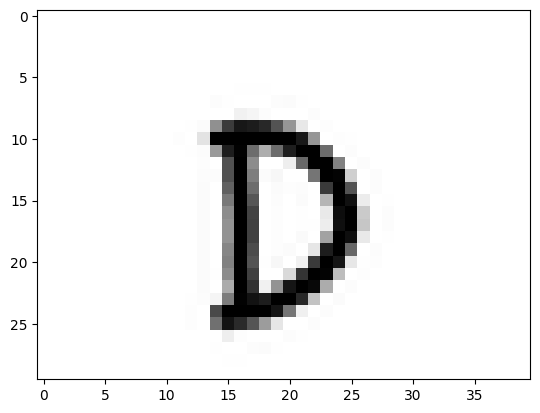

In [50]:
# Example of a picture
index = 2048            #0-208
plt.imshow(train_set_x_orig[index], cmap="gray")
print ("y = " + str(train_set_y[:, index]))